# Data Visualization, Cleaning & Prep For ML

This notebook will visualize the data to help us get a better understanding of how the variables interact with each other, and help us start thinking of what features will be useful for ML. 

This notebook will also clean the data and prepare it for ML by:
- rescaling if necessary
- one-hot encode categorical features
- visualize data before and after clean & prep

## 1 - Import Libraries

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display
import tabulate
import math
import scipy.stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

## 2 - Load Data

In [84]:
# test data
df_TE=pd.read_csv('test.csv')

# training data
df_TR=pd.read_csv('training.csv')
df_TR.head(3)

patient_id patient_race  payer_type patient_state  patient_zip3  \
0      475714          NaN    MEDICAID            CA           924   
1      349367        White  COMMERCIAL            CA           928   
2      138632        White  COMMERCIAL            TX           760   

   patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
0           84              F    NaN                       C50919   
1           62              F  28.49                       C50411   
2           43              F  38.09                       C50112   

                        breast_cancer_diagnosis_desc  \
0  Malignant neoplasm of unsp site of unspecified...   
1  Malig neoplm of upper-outer quadrant of right ...   
2  Malignant neoplasm of central portion of left ...   

  metastatic_cancer_diagnosis_code metastatic_first_novel_treatment  \
0                            C7989                              NaN   
1                             C773                              NaN   
2                             C773                              NaN   

  metastatic_first_novel_treatment_type Region            Division  \
0                                   NaN   West             Pacific   
1                                   NaN   West             Pacific   
2                                   NaN  South  West South Central   

    population      density  age_median  age_under_10  age_10_to_19  \
0  31437.75000  1189.562500   30.642857     16.014286     15.542857   
1  39121.87879  2295.939394   38.200000     11.878788     13.354545   
2  21996.68333   626.236667   37.906667     13.028333     14.463333   

     age_20s    age_30s    age_40s    age_50s    age_60s   age_70s  \
0  17.614286  14.014286  11.614286  11.557143   7.571429  4.000000   
1  14.230303  13.418182  13.333333  14.060606  10.248485  5.951515   
2  12.531667  13.545000  12.860000  12.770000  11.426667  6.565000   

   age_over_80       male     female    married   divorced  never_married  \
0     2.100000  49.857143  50.142857  36.571429  11.885714      47.114286   
1     3.503030  49.893939  50.106061  50.245455   9.827273      35.290909   
2     2.811667  50.123333  49.876667  55.753333  12.330000      27.195000   

    widowed  family_size  family_dual_income  income_household_median  \
0  4.442857     3.928571           52.228571              52996.28571   
1  4.651515     3.622727           61.736364             102741.63640   
2  4.710000     3.260667           55.801667              85984.74138   

   income_household_under_5  income_household_5_to_10  \
0                  3.142857                  4.000000   
1                  2.327273                  1.536364   
2                  2.483333                  1.305000   

   income_household_10_to_15  income_household_15_to_20  \
0                   6.157143                   5.142857   
1                   2.648485                   2.178788   
2                   2.716667                   2.938333   

   income_household_20_to_25  income_household_25_to_35  \
0                   6.271429                  10.142857   
1                   2.409091                   5.163636   
2                   2.766667                   6.763333   

   income_household_35_to_50  income_household_50_to_75  \
0                  13.300000                  20.000000   
1                   7.972727                  13.936364   
2                  12.061667                  15.835000   

   income_household_75_to_100  income_household_100_to_150  \
0                   12.742857                    11.571429   
1                   12.469697                    19.760606   
2                   13.560000                    20.875000   

   income_household_150_over  income_household_six_figure  \
0                   7.528571                    19.100000   
1                  29.596970                    49.357576   
2                  18.680000                    39.555000   

   income_individual_median  home_ownership  housing

## 3 - Data Visualization

In [3]:
# create a new df that stores the counts of object type variables as integers for future visuals

counts_df=pd.DataFrame()

for col in df_TR.columns:
    # skip target
    if col == 'DiagPeriodL90D':
        continue
    
    # check if column dtype is 'object'
    if df_TR[col].dtype == 'object':
        # calculate value counts and convert to integers
        value_counts = df_TR[col].value_counts().astype(int)
        
        print(value_counts) # print value counts for debugging
        counts_df = pd.concat([counts_df, value_counts.rename(col + '_counts')], axis = 1)

# merged new df with original df through the column
merged_df = pd.concat([df_TR, counts_df], axis = 1)

# drop original object columns from merged_df
drop_cols = [col for col in df_TR.columns if df_TR[col].dtype == 'object']
merged_df.drop(drop_cols, axis = 1, inplace = True)
        
merged_df.head(5)

patient_race
White       3588
Black       1056
Hispanic     829
Other        683
Asian        365
Name: count, dtype: int64
payer_type
COMMERCIAL            6032
MEDICAID              2569
MEDICARE ADVANTAGE    2502
Name: count, dtype: int64
patient_state
CA    2438
TX    1155
NY    1041
MI     858
IL     782
OH     754
FL     609
GA     551
PA     483
MN     377
CO     371
VA     365
IN     317
KY     259
AZ     229
WI     212
WA     200
NC     186
MO     160
NM     141
LA     139
TN     112
SC     110
ID      93
OK      93
OR      89
IA      86
MS      76
MD      71
AR      63
NV      62
KS      50
AL      50
MT      45
NE      40
UT      36
DE      33
WV      27
HI      21
NJ      21
DC      20
SD       8
ND       6
AK       6
WY       4
CT       2
PR       1
RI       1
NH       1
MA       1
Name: count, dtype: int64
patient_gender
F    12906
Name: count, dtype: int64
breast_cancer_diagnosis_code
1749      1982
C50911    1797
C50912    1712
C50919    1467
C50411     978
C50412     8

patient_id  patient_zip3  patient_age    bmi   population      density  \
0    475714.0         924.0         84.0    NaN  31437.75000  1189.562500   
1    349367.0         928.0         62.0  28.49  39121.87879  2295.939394   
2    138632.0         760.0         43.0  38.09  21996.68333   626.236667   
3    617843.0         926.0         45.0    NaN  32795.32558  1896.220930   
4    817482.0         836.0         55.0    NaN  10886.26000   116.886000   

   age_median  age_under_10  age_10_to_19    age_20s  ...  payer_type_counts  \
0   30.642857     16.014286     15.542857  17.614286  ...                NaN   
1   38.200000     11.878788     13.354545  14.230303  ...                NaN   
2   37.906667     13.028333     14.463333  12.531667  ...                NaN   
3   42.871429     10.071429     12.135714  12.538095  ...                NaN   
4   43.473469     10.824000     13.976000   9.492000  ...                NaN   

   patient_state_counts  patient_gender_counts  \
0                   NaN                    NaN   
1                   NaN                    NaN   
2                   NaN                    NaN   
3                   NaN                    NaN   
4                   NaN                    NaN   

   breast_cancer_diagnosis_code_counts  breast_cancer_diagnosis_desc_counts  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   

   metastatic_cancer_diagnosis_code_counts  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   metastatic_first_novel_treatment_counts  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   metastatic_first_novel_treatment_type_counts  Region_counts  \
0                                           NaN            NaN   
1                                           NaN            NaN   
2                                           NaN            NaN   
3                                           NaN            NaN   
4                                           NaN            NaN   

   Division_counts  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  

[5 rows x 83 columns]

In [4]:
counts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, White to New England
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   patient_race_counts                           5 non-null      float64
 1   payer_type_counts                             3 non-null      float64
 2   patient_state_counts                          50 non-null     float64
 3   patient_gender_counts                         1 non-null      float64
 4   breast_cancer_diagnosis_code_counts           50 non-null     float64
 5   breast_cancer_diagnosis_desc_counts           50 non-null     float64
 6   metastatic_cancer_diagnosis_code_counts       43 non-null     float64
 7   metastatic_first_novel_treatment_counts       2 non-null      float64
 8   metastatic_first_novel_treatment_type_counts  1 non-null      float64
 9   Region_counts                                 4 non-null  

### 3.1 - Viz w/o Categorical Variables

In [28]:
df_temp = pd.DataFrame()

num_df = pd.concat([df_TR, df_temp], axis = 1)

drop_cat_cols = [col for col in df_TR.columns if df_TR[col].dtype == 'object']
num_df.drop(drop_cat_cols, axis = 1, inplace = True)
        
print(num_df.head(5))
print(num_df.info())

   patient_id  patient_zip3  patient_age    bmi   population      density  \
0      475714           924           84    NaN  31437.75000  1189.562500   
1      349367           928           62  28.49  39121.87879  2295.939394   
2      138632           760           43  38.09  21996.68333   626.236667   
3      617843           926           45    NaN  32795.32558  1896.220930   
4      817482           836           55    NaN  10886.26000   116.886000   

   age_median  age_under_10  age_10_to_19    age_20s  ...   disabled  \
0   30.642857     16.014286     15.542857  17.614286  ...  12.871429   
1   38.200000     11.878788     13.354545  14.230303  ...   8.957576   
2   37.906667     13.028333     14.463333  12.531667  ...  11.253333   
3   42.871429     10.071429     12.135714  12.538095  ...   8.845238   
4   43.473469     10.824000     13.976000   9.492000  ...  15.276000   

     poverty  limited_english  commute_time  health_uninsured    veteran  \
0  22.542857        10.10000

In [6]:
FeatNames=[]

for col in num_df.columns:
    if col != 'DiagPeriodL90D': # exclude target
        FeatNames.append(col)
        
print(FeatNames)

['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above', 'education_stem_degree', 'labor_force_participatio

In [7]:
df_sig = num_df[num_df.DiagPeriodL90D==1]
df_bkg = num_df[num_df.DiagPeriodL90D==0]

patient_id


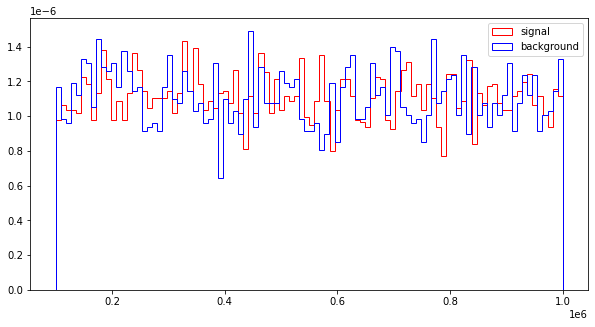

patient_zip3


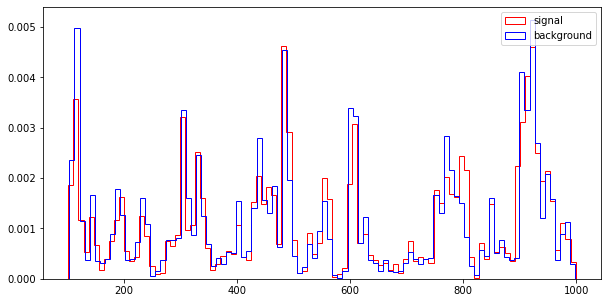

patient_age


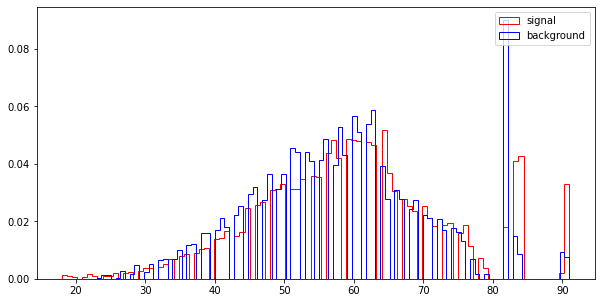

bmi


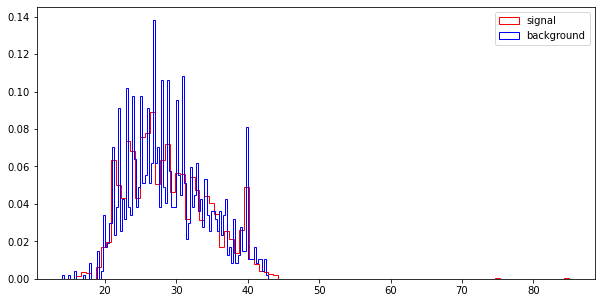

population


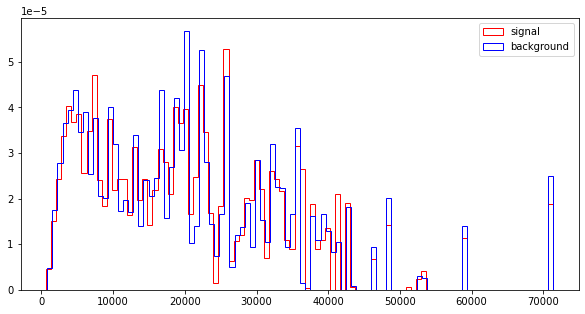

density


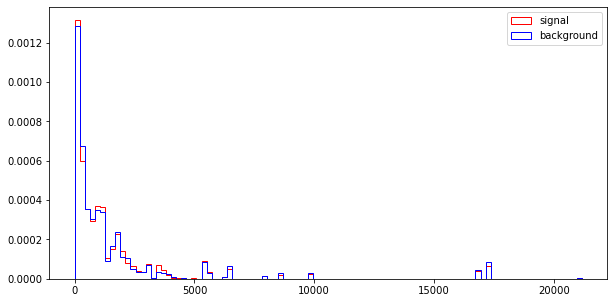

age_median


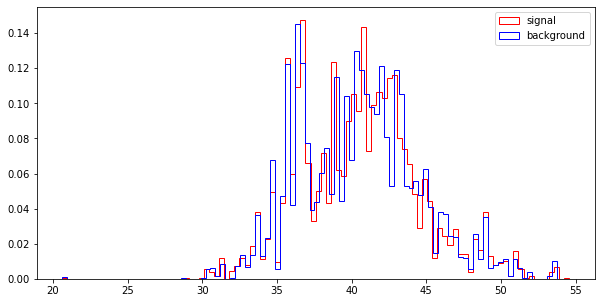

age_under_10


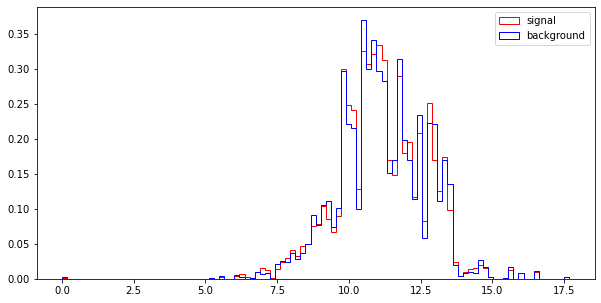

age_10_to_19


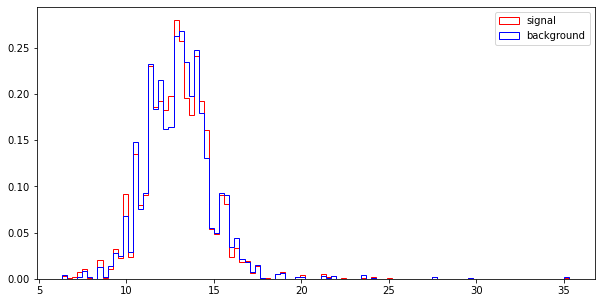

age_20s


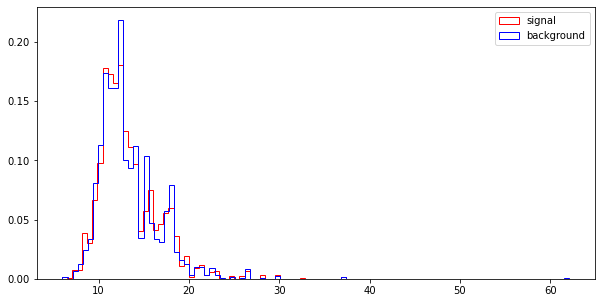

age_30s


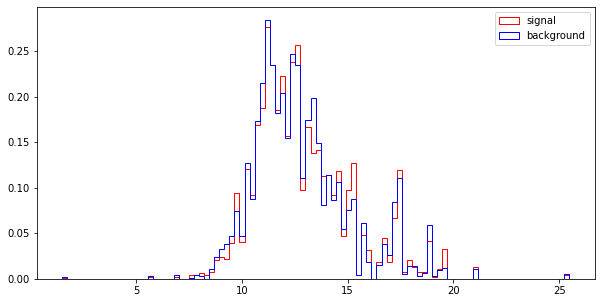

age_40s


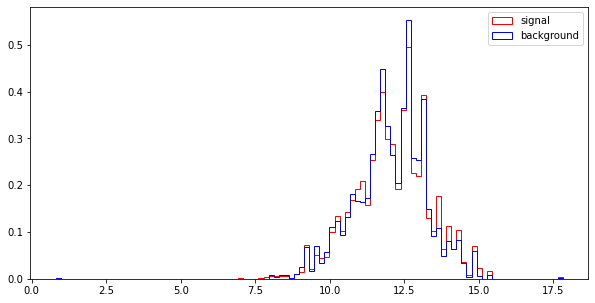

age_50s


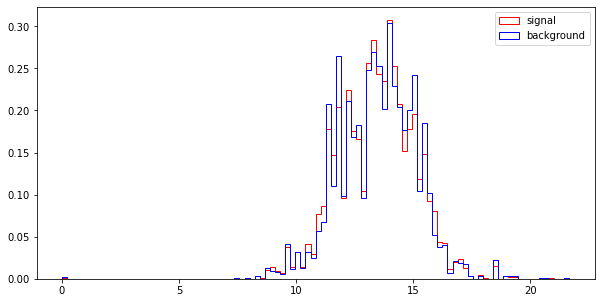

age_60s


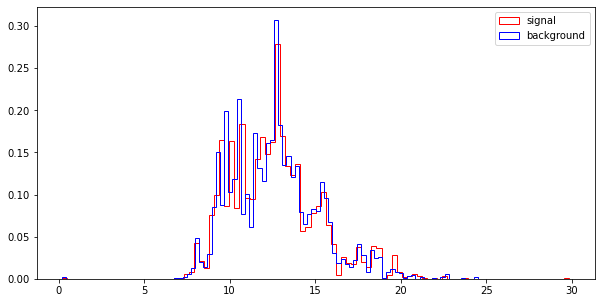

age_70s


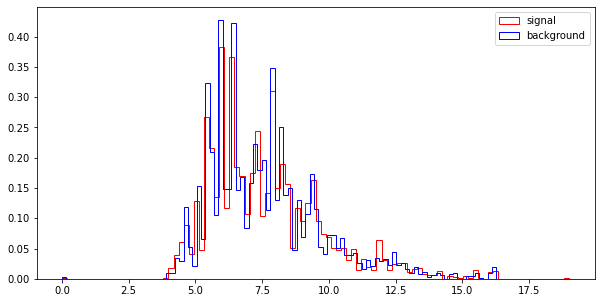

age_over_80


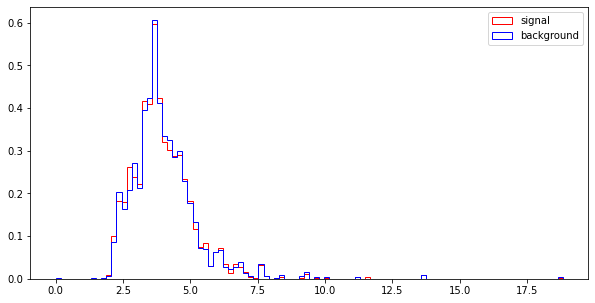

male


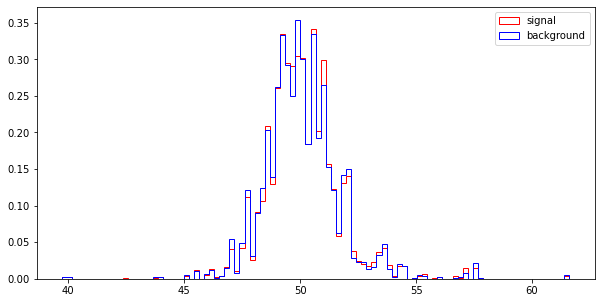

female


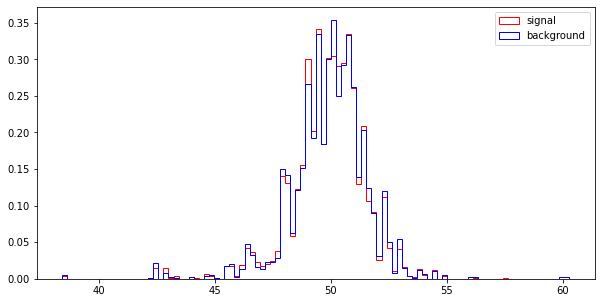

married


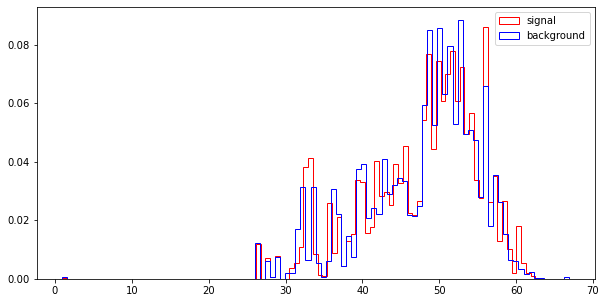

divorced


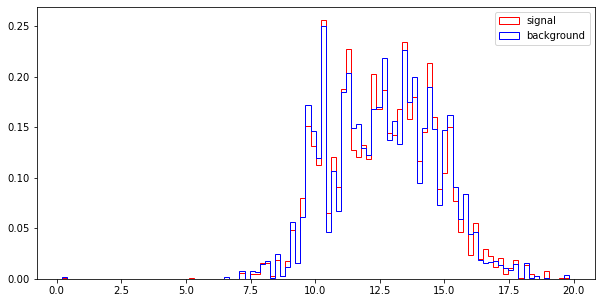

never_married


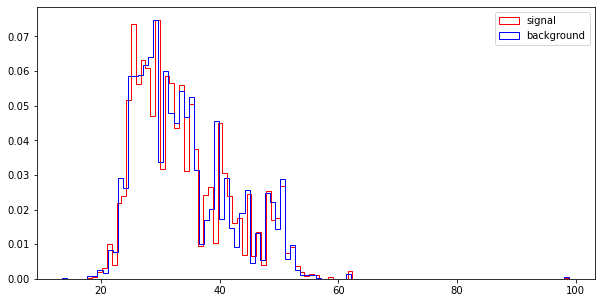

widowed


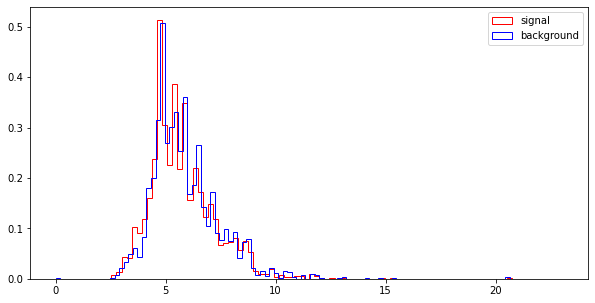

family_size


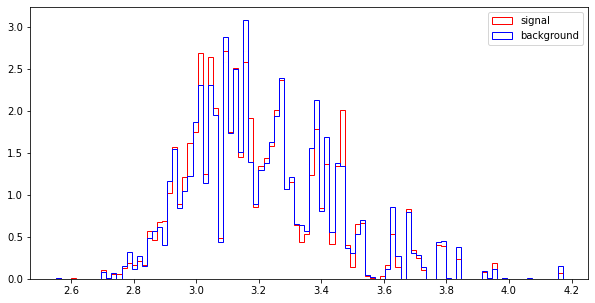

family_dual_income


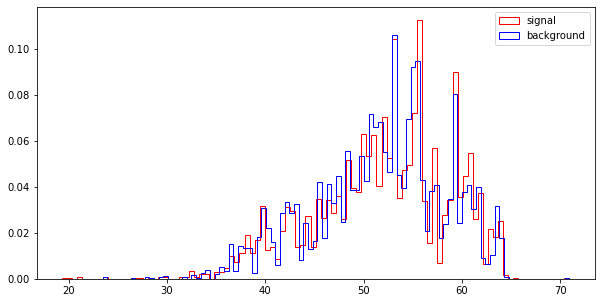

income_household_median


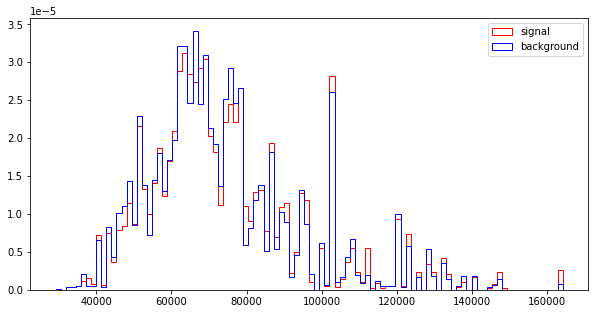

income_household_under_5


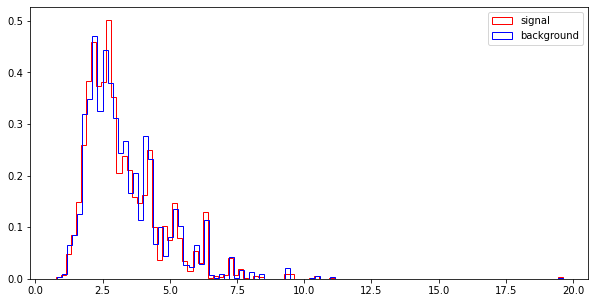

income_household_5_to_10


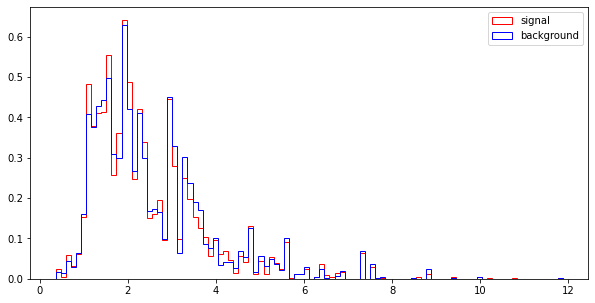

income_household_10_to_15


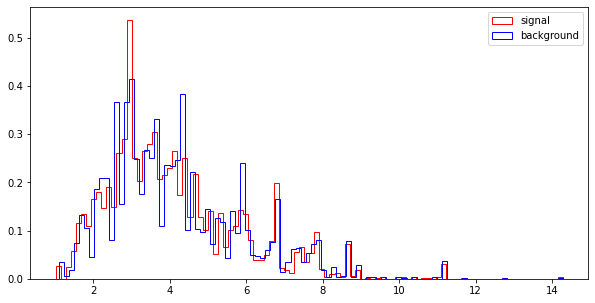

income_household_15_to_20


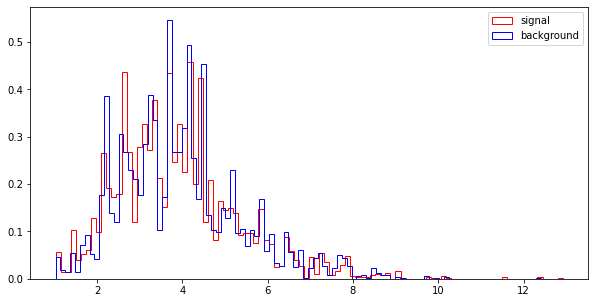

income_household_20_to_25


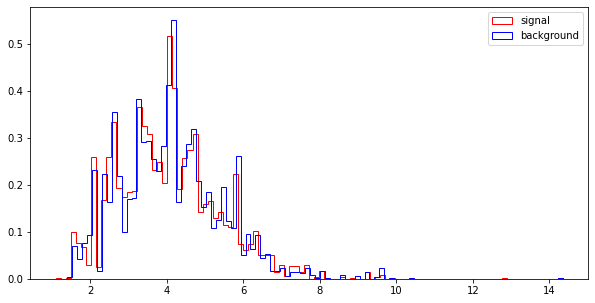

income_household_25_to_35


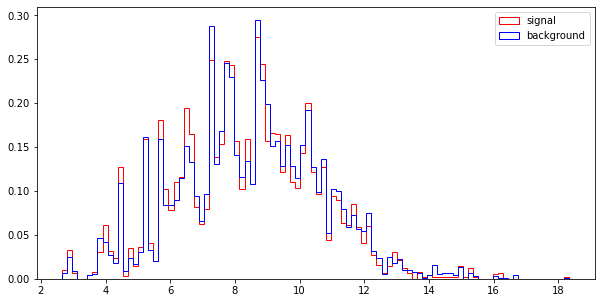

income_household_35_to_50


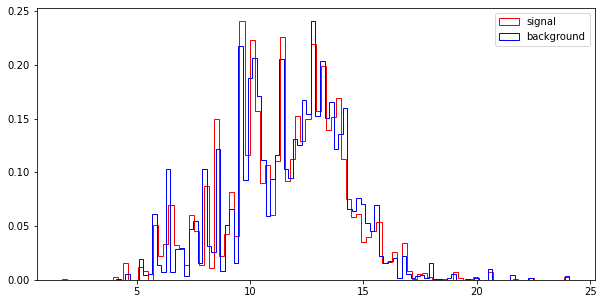

income_household_50_to_75


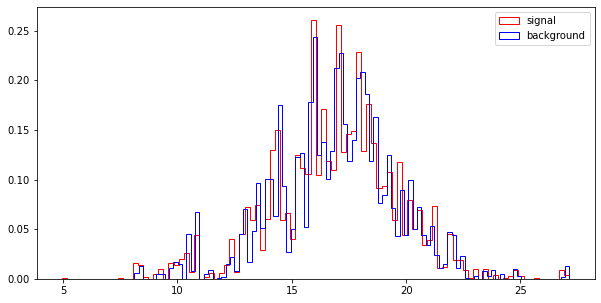

income_household_75_to_100


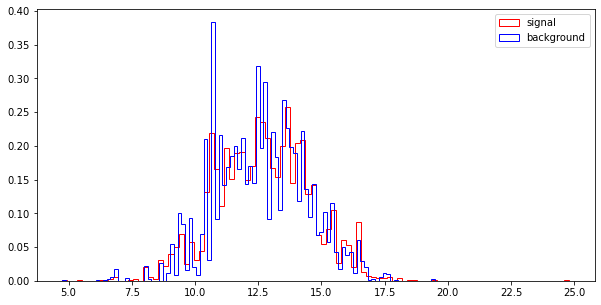

income_household_100_to_150


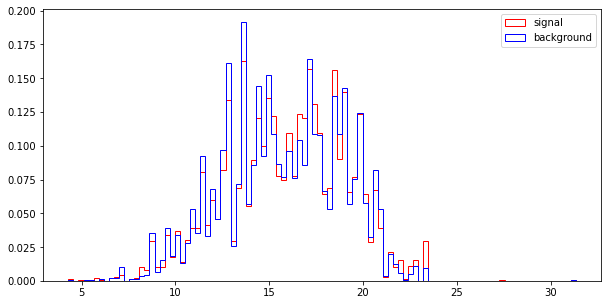

income_household_150_over


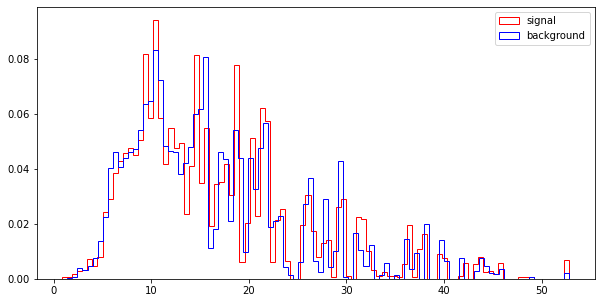

income_household_six_figure


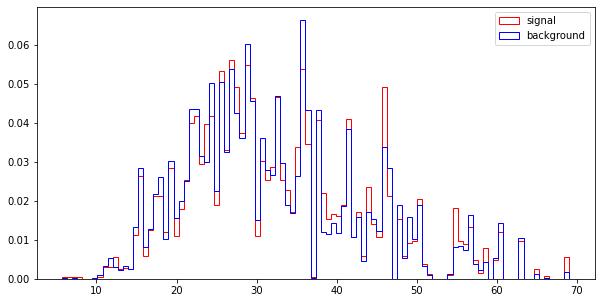

income_individual_median


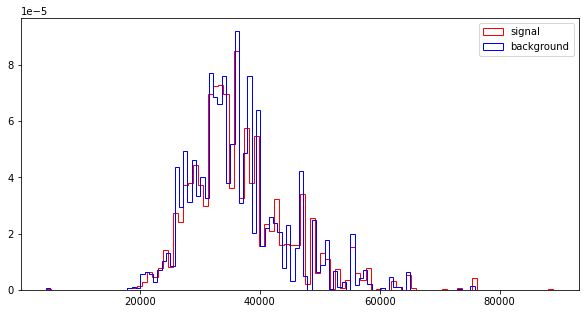

home_ownership


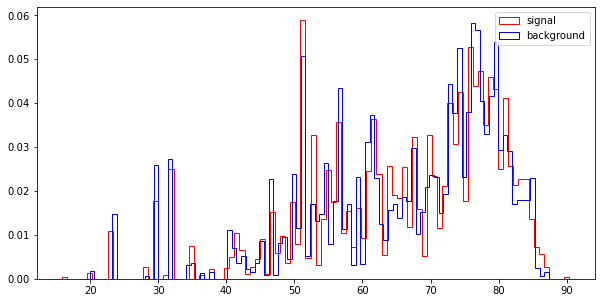

housing_units


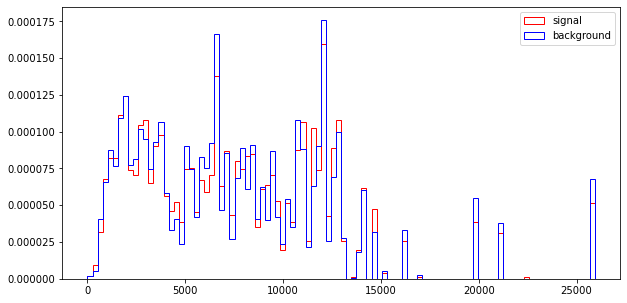

home_value


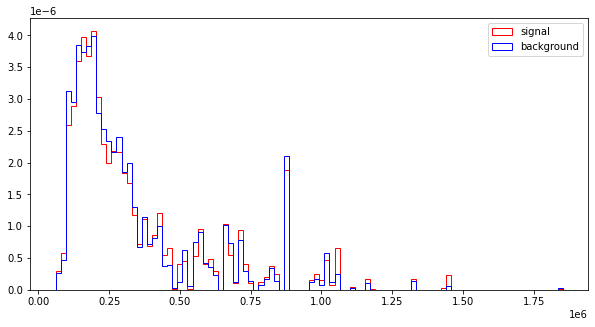

rent_median


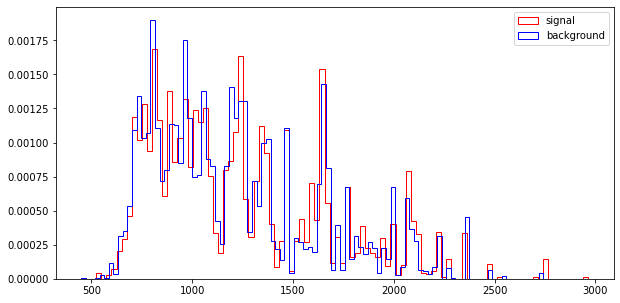

rent_burden


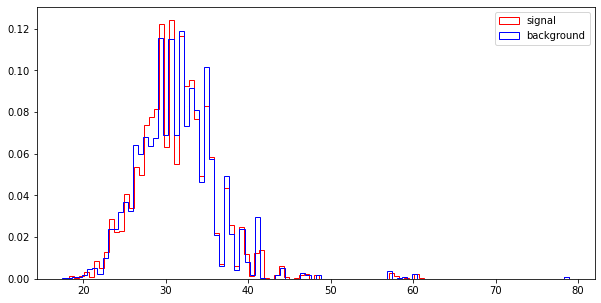

education_less_highschool


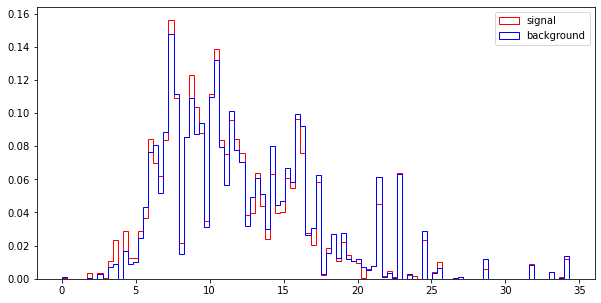

education_highschool


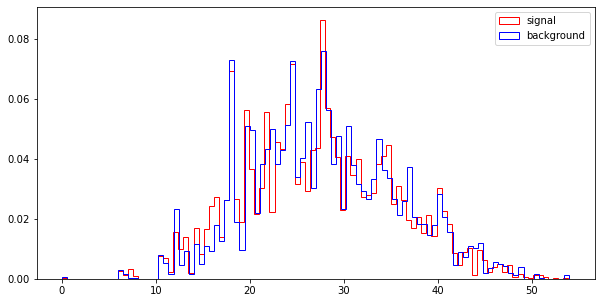

education_some_college


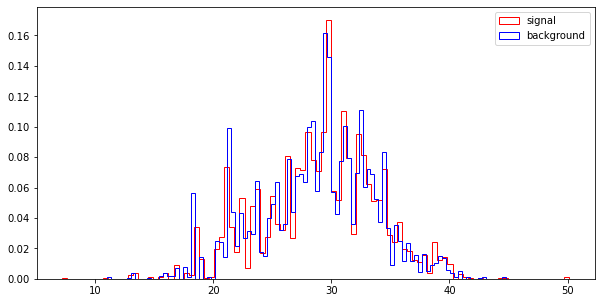

education_bachelors


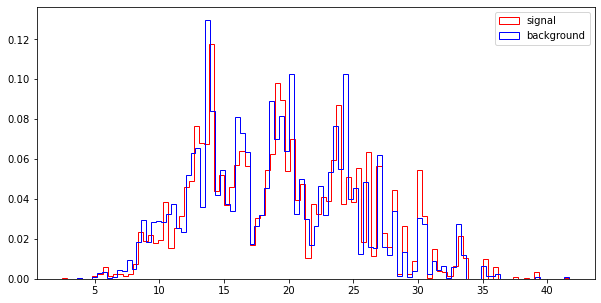

education_graduate


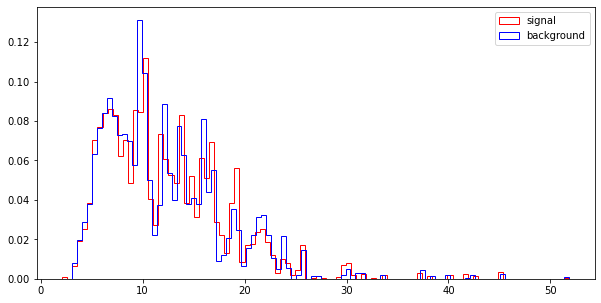

education_college_or_above


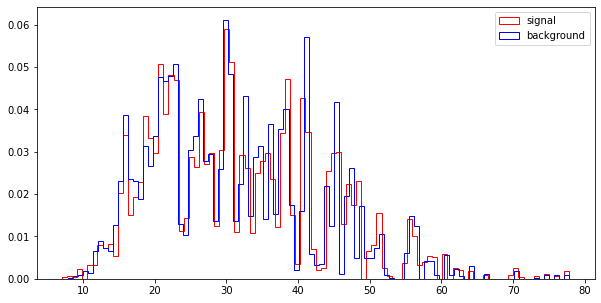

education_stem_degree


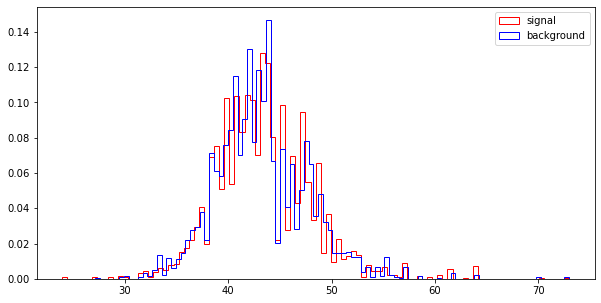

labor_force_participation


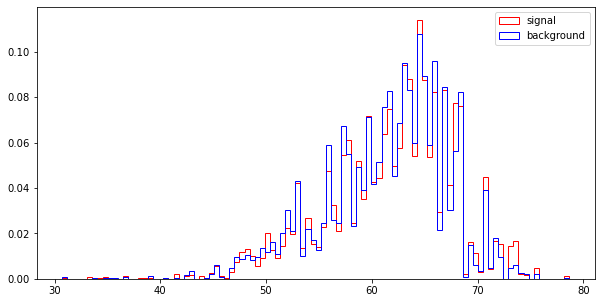

unemployment_rate


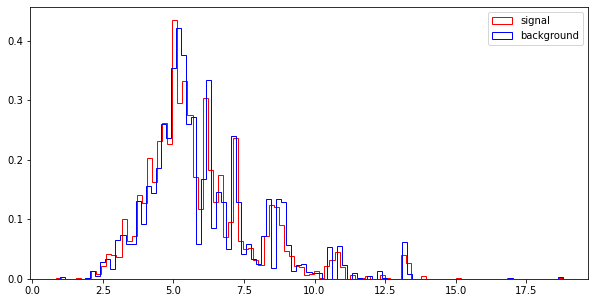

self_employed


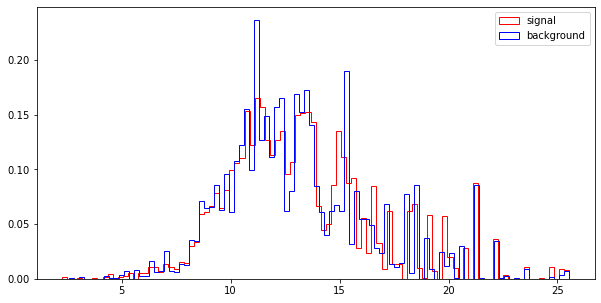

farmer


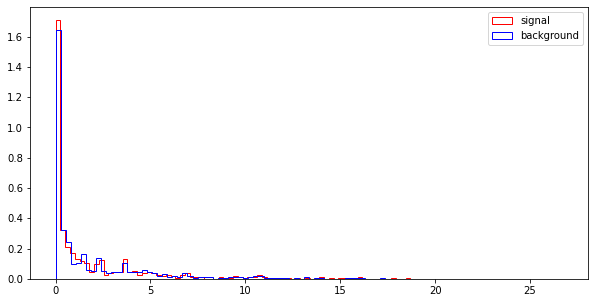

race_white


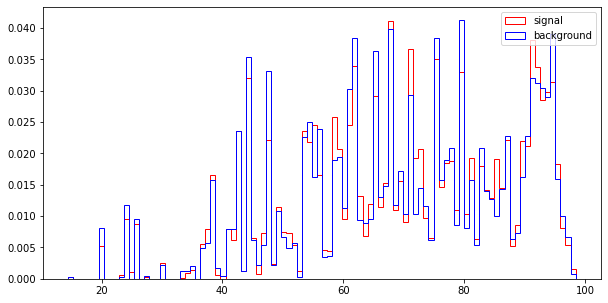

race_black


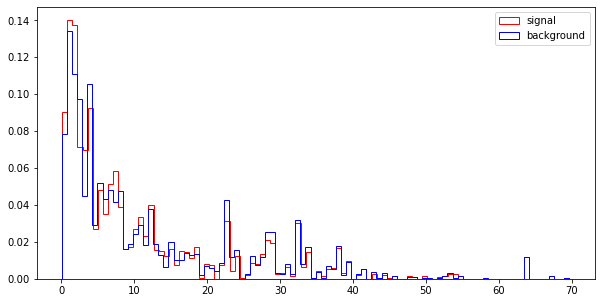

race_asian


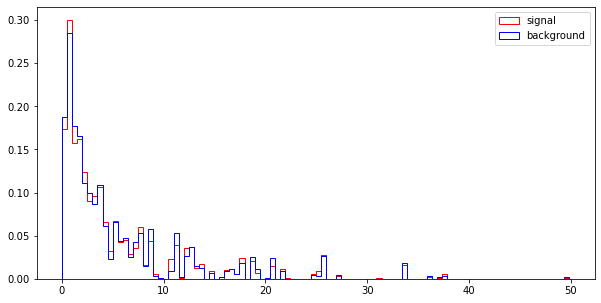

race_native


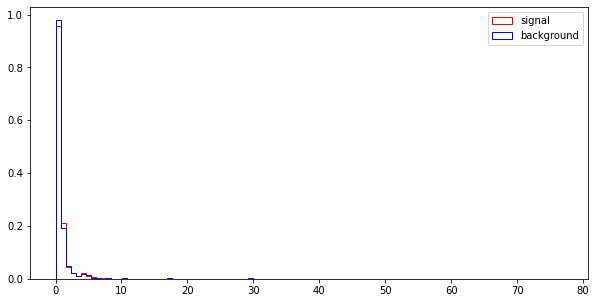

race_pacific


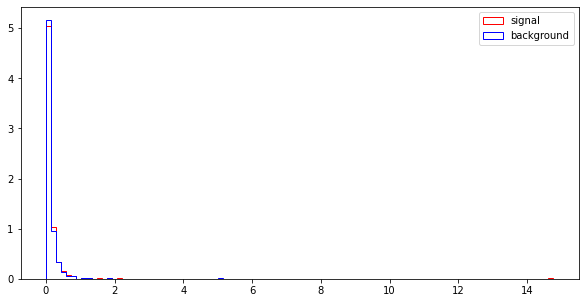

race_other


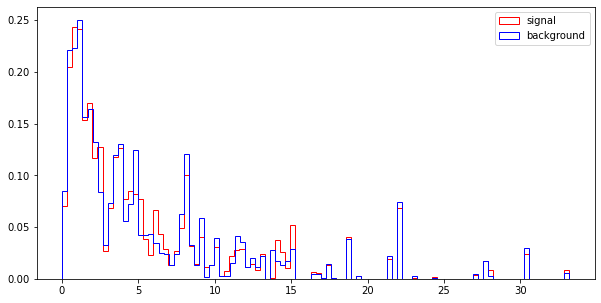

race_multiple


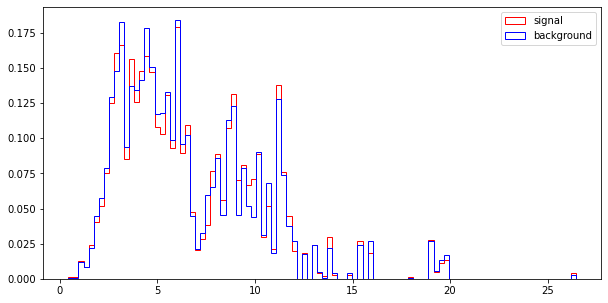

hispanic


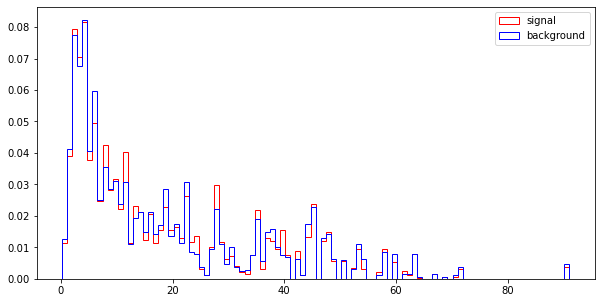

disabled


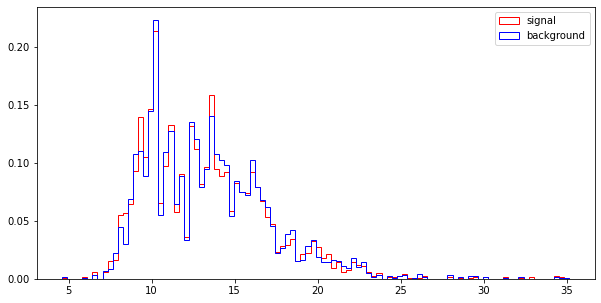

poverty


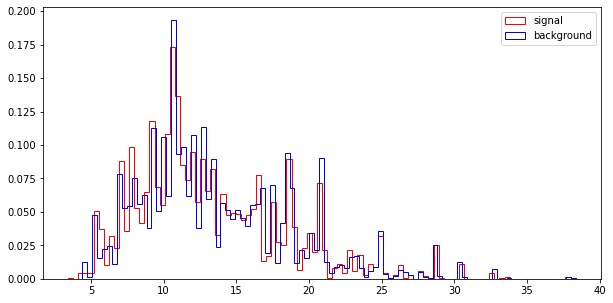

limited_english


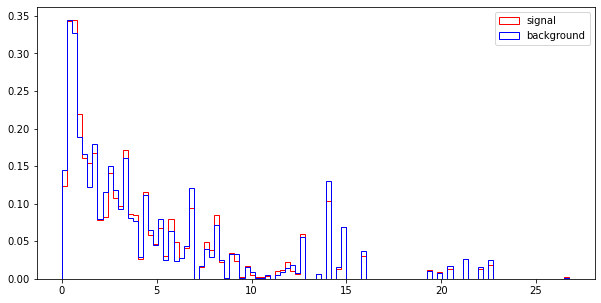

commute_time


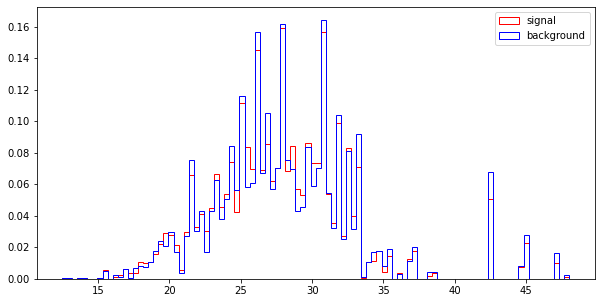

health_uninsured


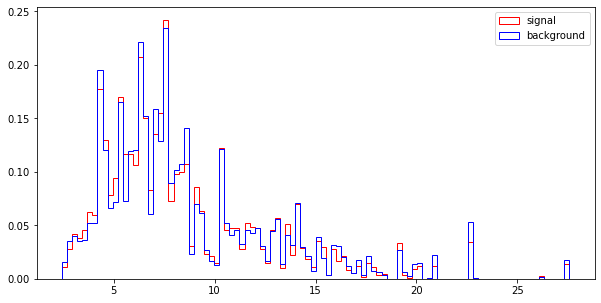

veteran


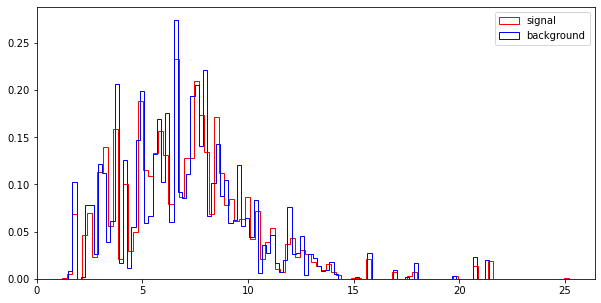

Ozone


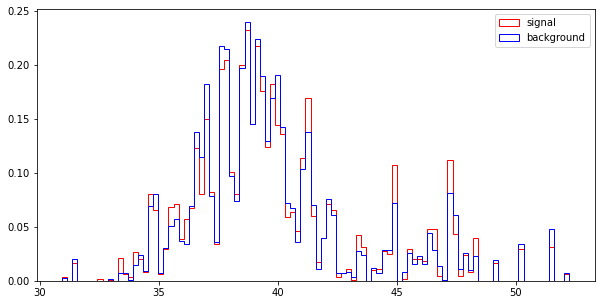

PM25


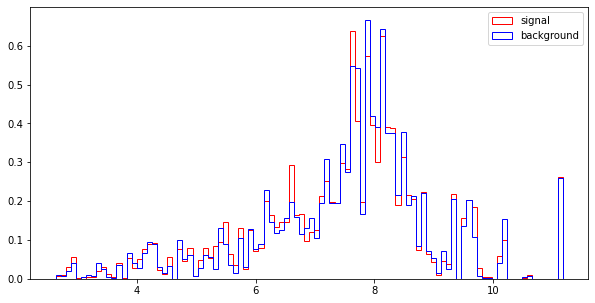

N02


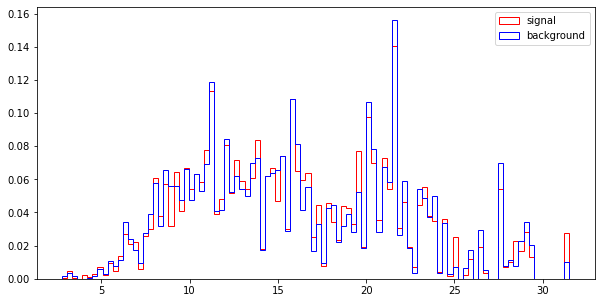

In [8]:
for Feat in FeatNames:
    print(Feat)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[Feat]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[Feat]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

### Note:
I see outliers, however, clipping them may result in substantial information loss especially for healthcare data. Choose a ML model that is not sensitive to outliers. Scaling may also reduce impact of outliers.

In [9]:
def compare_features_binary(df,target_col='DiagPeriodL90D',logscale=False):
    # Divide the data into separate dfs for the two categories
    df_0=df[df[target_col]==0]
    df_1=df[df[target_col]==1]
    
    print("Number of catogory 0:",df_0.shape[0])
    print("Number of catogory 1:",df_1.shape[0])
    
    # Make a grid of plots
    N_Features = df.shape[1] - 1 # skip over the target col
    N_X= math.ceil(math.sqrt(N_Features))
    N_Y= math.floor(math.sqrt(N_Features))
    if N_X*N_Y<N_Features:
        N_Y+=1

    print("Found",N_Features,"features. Creating grid of",N_X,"by",N_Y)
    
    # Histogram Features
    plt.figure(figsize=(50,50))

    for i,column in enumerate(df_0.columns):
            
        KS_test=scipy.stats.kstest(df_0[column],df_1[column]).statistic
        KS_test_str="{KS:.3f}".format(KS=KS_test)
        print(column,"KS Distribution Similarity Test:", KS_test_str)
        
        plt.subplot(N_X,N_Y,i+1)
        plt.title(KS_test_str)
        if logscale:
            plt.yscale("log")
        plt.hist(df_0[column],bins=100, histtype="step", color="red",label="0",density=1, stacked=True)
        plt.hist(df_1[column],bins=100, histtype="step", color="blue",label="1",density=1, stacked=True)
        plt.legend()
        plt.xlabel(column)
        
    plt.tight_layout()
    plt.show()

Number of catogory 0: 4846
Number of catogory 1: 8060
Found 71 features. Creating grid of 9 by 8
patient_id KS Distribution Similarity Test: 0.018
patient_zip3 KS Distribution Similarity Test: 0.042
patient_age KS Distribution Similarity Test: 0.059
bmi KS Distribution Similarity Test: 0.050
population KS Distribution Similarity Test: 0.015
density KS Distribution Similarity Test: 0.019
age_median KS Distribution Similarity Test: 0.015
age_under_10 KS Distribution Similarity Test: 0.018
age_10_to_19 KS Distribution Similarity Test: 0.022
age_20s KS Distribution Similarity Test: 0.015
age_30s KS Distribution Similarity Test: 0.028
age_40s KS Distribution Similarity Test: 0.034
age_50s KS Distribution Similarity Test: 0.022
age_60s KS Distribution Similarity Test: 0.016
age_70s KS Distribution Similarity Test: 0.016
age_over_80 KS Distribution Similarity Test: 0.015
male KS Distribution Similarity Test: 0.015
female KS Distribution Similarity Test: 0.016
married KS Distribution Similarit

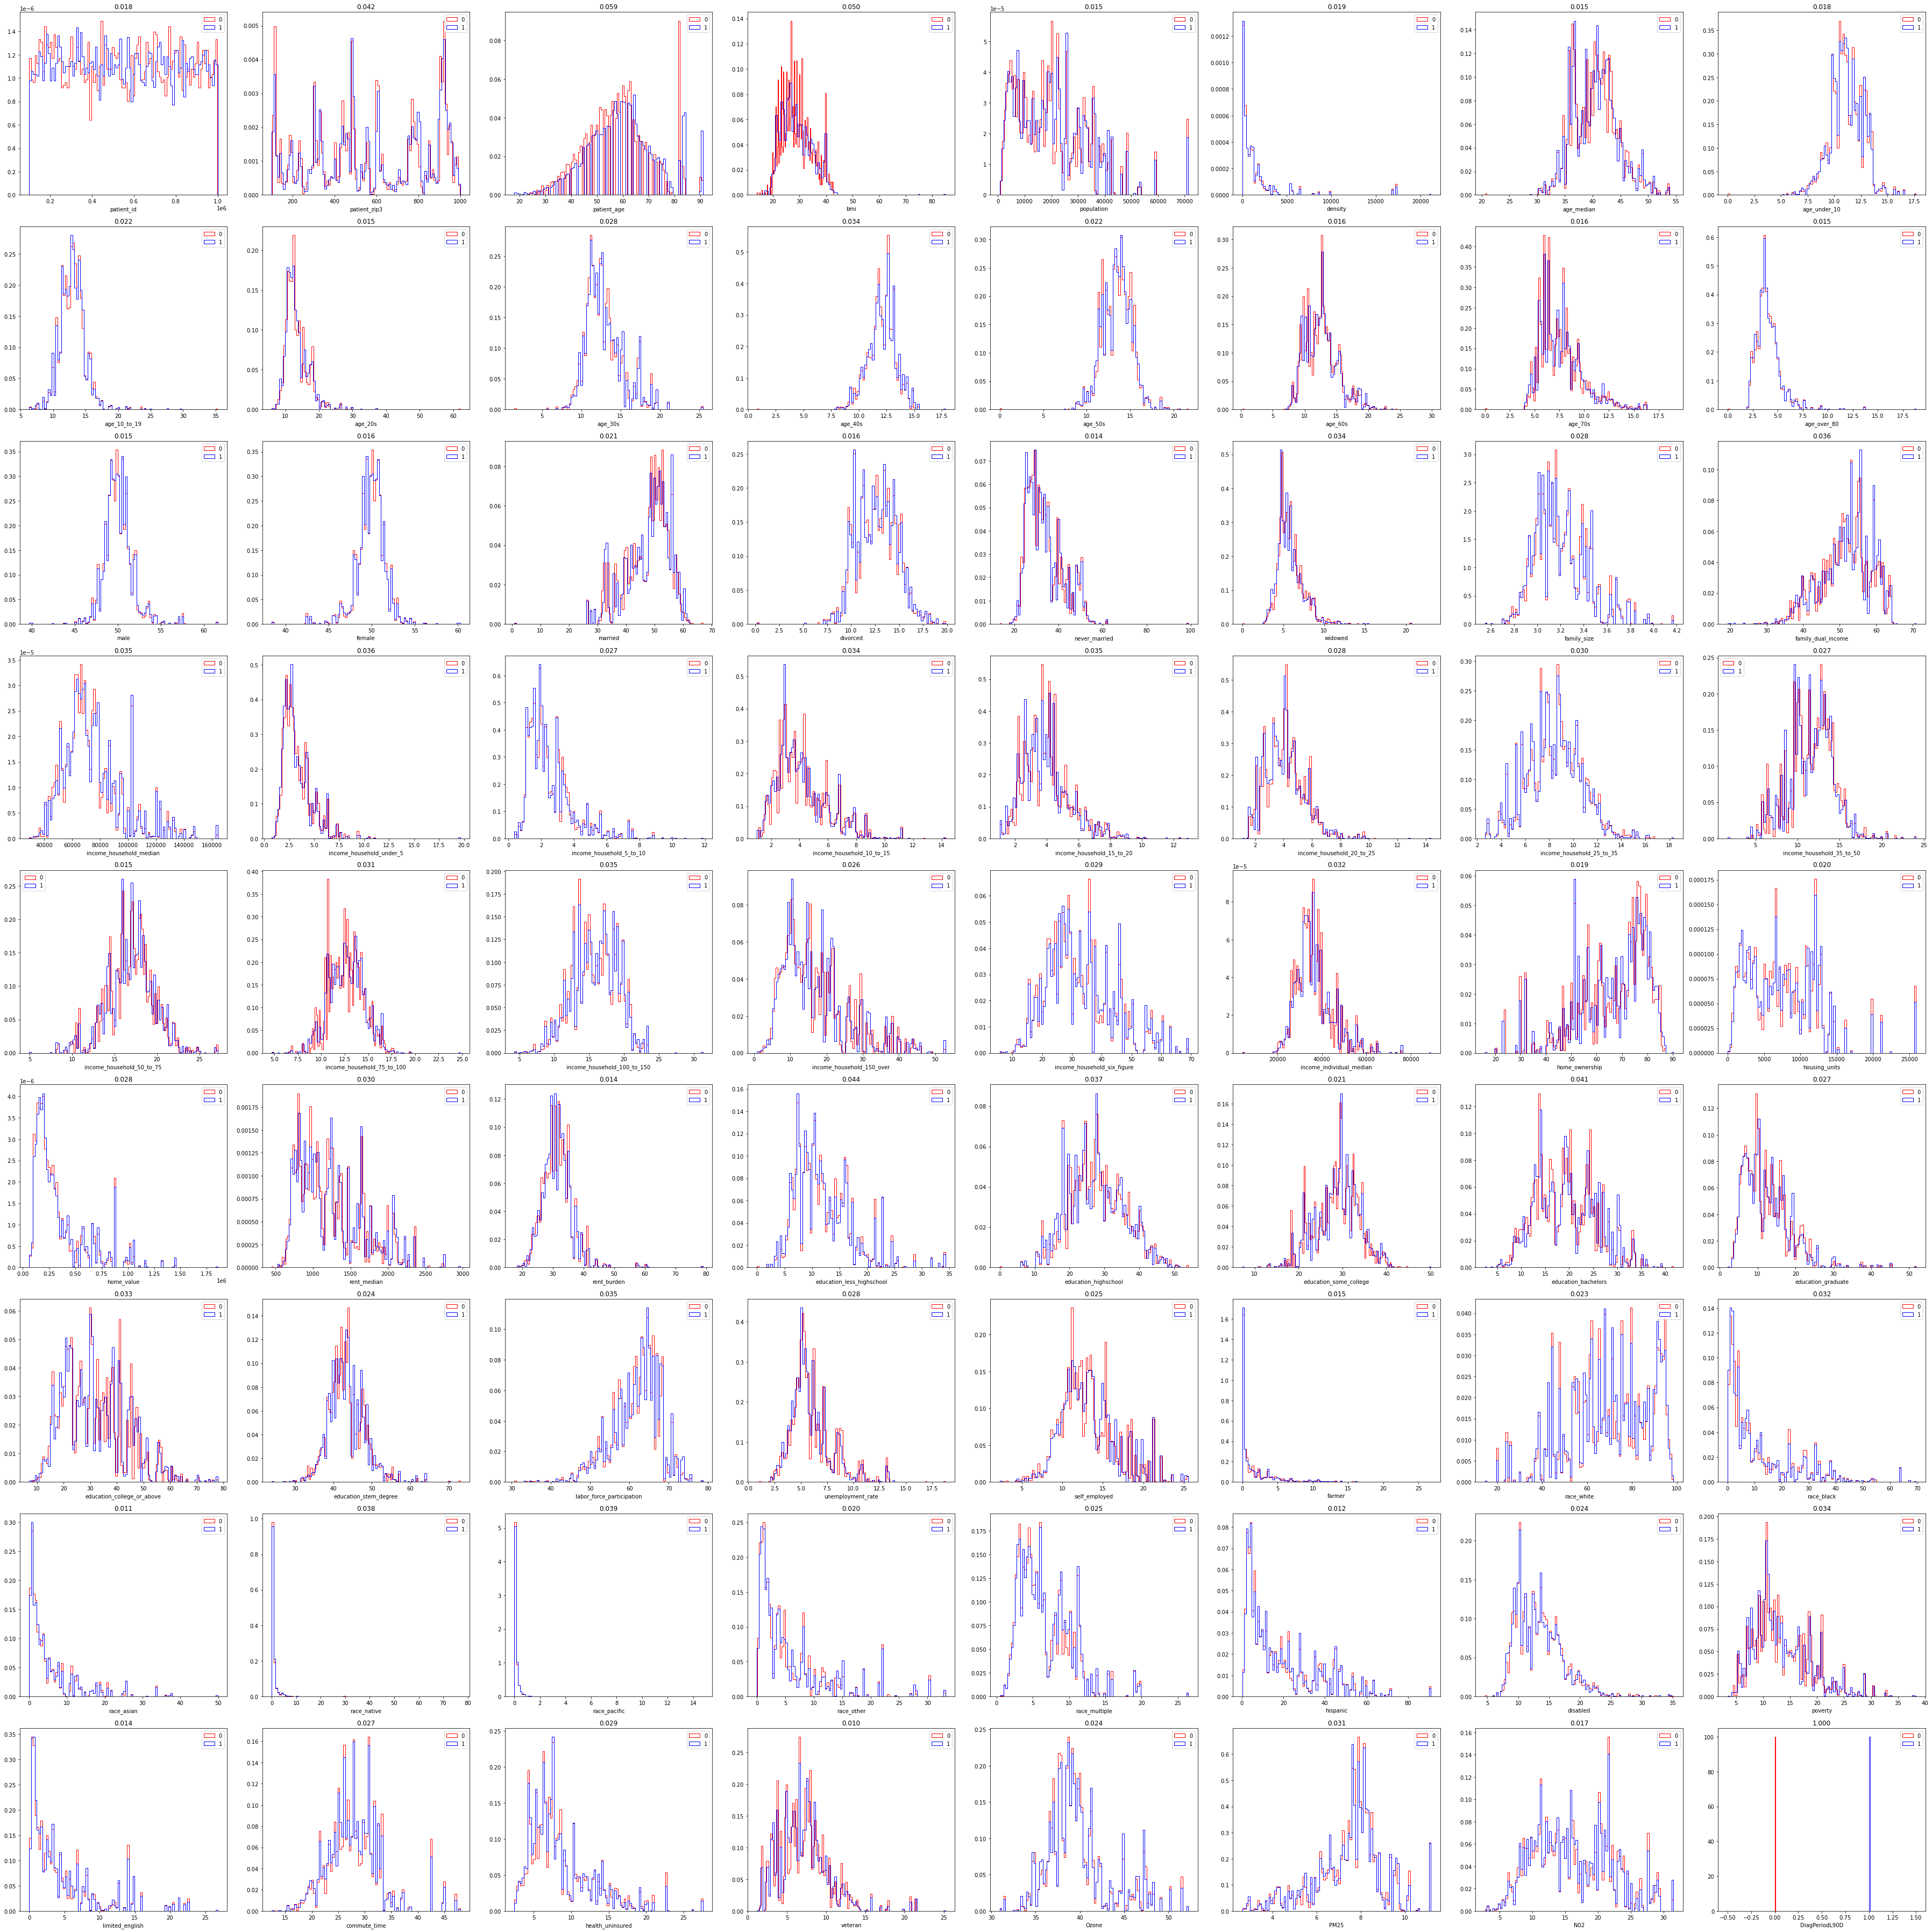

In [10]:
compare_features_binary(num_df)

#### Note:
ValueError: autodetected range of [nan, nan] is not finite. Problem with NaN values. Data is not properly preprocessed which is causing an issue with visualization. Data excludes feature counts made with merged_df.

Most features that KS examined are under 0.05 making the lack of fit significant. Patient_age (59) is over that threshold and is the most fit feature, bmi (0.50) is the second highest.

In [11]:
c_df = num_df.corr()
c_df

patient_id  patient_zip3  patient_age       bmi  population  \
patient_id        1.000000      0.020582     0.008109 -0.005282    0.001216   
patient_zip3      0.020582      1.000000    -0.062820 -0.048912    0.098969   
patient_age       0.008109     -0.062820     1.000000 -0.063885   -0.018048   
bmi              -0.005282     -0.048912    -0.063885  1.000000   -0.037956   
population        0.001216      0.098969    -0.018048 -0.037956    1.000000   
...                    ...           ...          ...       ...         ...   
veteran          -0.004947      0.038637     0.002469  0.027936   -0.500773   
Ozone            -0.007240      0.391243    -0.025899 -0.028554    0.081358   
PM25              0.011283     -0.067037    -0.023002 -0.000955    0.385453   
N02               0.004696     -0.073708     0.014842 -0.038425    0.672527   
DiagPeriodL90D    0.002405      0.036372     0.055634 -0.005710   -0.006576   

                 density  age_median  age_under_10  age_10_to_19   age_20s  \
patient_id     -0.007420    0.005052     -0.004164     -0.018012 -0.003972   
patient_zip3   -0.196672   -0.148139      0.057007      0.032373  0.095140   
patient_age    -0.002532    0.040121     -0.026532     -0.029747 -0.020619   
bmi            -0.003744   -0.023318      0.056463      0.006254  0.001980   
population      0.730978   -0.550534      0.254734      0.000769  0.437070   
...                  ...         ...           ...           ...       ...   
veteran        -0.490779    0.346022     -0.169988     -0.077042 -0.115530   
Ozone          -0.125028   -0.053456     -0.037017      0.067999  0.061217   
PM25            0.199350   -0.462901      0.265457      0.201937  0.323625   
N02             0.578692   -0.487052      0.177107     -0.014700  0.420146   
DiagPeriodL90D -0.017286   -0.000405     -0.008986     -0.015172  0.003433   

                ...  disabled   poverty  limited_english  commute_time  \
patient_id      ...  0.008579  0.011670         0.015787      0.002053   
patient_zip3    ... -0.122086 -0.043850         0.204614     -0.158604   
patient_age     ...  0.015360  0.000160        -0.028202     -0.034837   
bmi             ...  0.079222  0.072223        -0.026662     -0.041276   
population      ... -0.533190  0.102763         0.671453      0.471734   
...             ...       ...       ...              ...           ...   
veteran         ...  0.408566 -0.099426        -0.493361     -0.373883   
Ozone           ... -0.004815  0.010937         0.061121     -0.015598   
PM25            ... -0.217333  0.199358         0.331874      0.137931   
N02             ... -0.531991  0.002561         0.427857      0.339252   
DiagPeriodL90D  ... -0.020376 -0.024817        -0.011443     -0.027375   

                health_uninsured   veteran     Ozone      PM25       N02  \
patient_id              0.017442 -0.004947 -0.007240  0.011283  0.004696   
patient_zip3            0.139937  0.038637  0.391243 -0.067037 -0.073708   
patient_age            -0.036265  0.002469 -0.025899 -0.023002  0.014842   
bmi                     0.061944  0.027936 -0.028554 -0.000955 -0.038425   
population              0.057856 -0.500773  0.081358  0.385453  0.672527   
...                          ...       ...       ...       ...       ...   
veteran                 0.080997  1.000000  0.122304 -0.408331 -0.479849   
Ozone                  -0.029278  0.122304  1.000000 -0.136923  0.055694   
PM25                    0.222733 -0.408331 -0.136923  1.000000  0.285042   
N02                    -0.174115 -0.479849  0.055694  0.285042  1.000000   
DiagPeriodL90D         -0.028565 -0.001031  0.007883 -0.016500  0.000763   

                DiagPeriodL90D  
patient_id            0.002405  
patient_zip3          0.036372  
patient_age           0.055634  
bmi                  -0.005710  
population           -0.006576  
...                        ...  
veteran              -0.001031  
Ozone                 0.007883  
PM25                 -0.016500 

In [12]:
c_matrix = c_df.to_numpy()

for i in range(c_matrix.shape[0]): c_matrix[i][i]=0.

In [13]:
from collections import OrderedDict
corr_dict=OrderedDict()

for i in range(c_matrix.shape[0]):
    for j in range(c_matrix.shape[0]):
        corr_dict[(i,j)]=c_matrix[i][j]

(array([  36.,  222.,  410.,  648., 1102., 1342.,  678.,  460.,  222.,
          64.]),
 array([-0.99999997, -0.80171523, -0.60343049, -0.40514576, -0.20686102,
        -0.00857629,  0.18970845,  0.38799318,  0.58627792,  0.78456266,
         0.98284739]),
 <BarContainer object of 10 artists>)

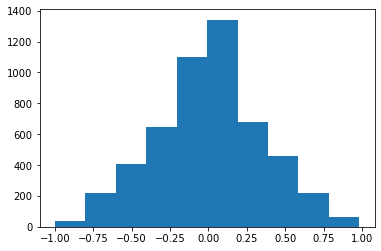

In [14]:
corr_dict_sorted = OrderedDict(sorted(corr_dict.items(),
                                      key=lambda x: math.fabs(x[1])))

plt.hist(corr_dict_sorted.values())

## 4 - Data Prep

In [15]:
print(f"Before - training shape: {df_TR.shape}, test shape: {df_TE.shape}")

Before - training shape: (12906, 83), test shape: (5792, 82)


### 4.1 - Impute

(1) Potential collections:
- age group using patient_age
- environment using air quality toxins (Ozone, PM25, NO2)

(2) As said before during loading the data:
- patient_gender and metastatic_first_novel_treatment_type has only one unique value and should be removed.
- metastatic_first_novel_treatment (99%) has a significant amount of missing values and will be dropped.
- education_college_or_above and income_household_six_figure will be dropped due to redundancy.
- BMI (69%) and patient_race (49%) have a significant amount of missing values; decide on method of imputation.

(3) Other Missing Values (>50):
- payer_type
- patient_state (zip3 has no missing values and is a sufficient way of providing information about a patient's location in healthcare -- this col will be dropped, no need for imputation)
- Region
- Division


(4 (will be dropped in section 1)) The rest of the missing values (<30) in the other features' rows will be dropped.

### 4.1.1 - Group Collections

In [16]:
# groups 3 different air quality features into one group that represents the air pollutants/toxins
def combine_air_quality(df):
    
    df['pollutants'] = df['Ozone'] * df['PM25'] * df['N02']
    return df

# creates age group column to assist imputation
# patient_age was the highest corr feature and is best connected with the other features
def age_group_col(df):
    
    # lookup patient's age and round to the nearest 10
    df['age_group'] = round(df['patient_age'], -1) + 10 # added 10 shifts rounded age to stop intial age = 0.
    df['age_group'].value_counts() 
    return df

### 4.1.2 - Drop Missing Values

In [17]:
# drop the columns mentioned above
## dropped patient_id as it provides nothing for the machine to learn -- unique value
## dropped air quality values since they were merged into a group representing a single feature

dropped_col = ['patient_gender','metastatic_first_novel_treatment_type',
               'metastatic_first_novel_treatment','patient_state','patient_id','income_household_six_figure',
              'education_college_or_above','Ozone','PM25','N02']

# drops entire col/feature
def drop_col(df, dropped_col):

    df = df.drop(columns=dropped_col)
    print(f"\nDropped columns '{dropped_col}'")
    return df

### Note:
Reminder to place the drop_col first to reduce computation power needed and place drop_na last so the features will run through their appropriate imputation methods first before prematurally dropping thier NaN values.

### 4.1.3 - Imputation Methods

In [18]:
# aggregate function that fills the NaN values of target col 
# with the average of the grouped col -- not an imputation
def agg(df,group_col,input_col,method='mean'):
    result = {}
    for group in df[group_col].unique():
        
        # filters df for selected goup
        group_df = df[df[group_col] == group]
        
        # converts 'input_col' to numeric, handles NaN values by skipping them
        numeric_col = pd.to_numeric(group_df[input_col], errors='coerce')
        
        if method == 'mean':
            # calculates mean numeric values and automatically skips NaN values
            result[group] = numeric_col.mean()
        elif method == 'mode':
            result[group] = group_df[input_col].mode()[0]
        elif method == 'median':
            result[group] = group_df[input_col].median()
        else:
            raise ValueError('Incorrect imputation method')
    return result

In [19]:
# impute bmi by the mean of the age group
def impute_bmi(df):
    
    # NaN values before imputation
    # print('Number of missing bmi - Before:',df['bmi'].isna().sum()) # must be placed before since imputation ignores NaN values
    
    # in case age_group col wasn't called and placed correctly, adds age_group col
    if 'age_group' not in df.columns:
        df = age_group_col(df)
        
    # aggregates mean bmi for each age group
    bmi_by_age_group = agg(df,'age_group','bmi',method='mean') # aggregates bmi by age group
    df['bmi'] = df['bmi'].fillna(df['age_group'].map(bmi_by_age_group)) # fills missing bmi with mean bmi for age group
    print('Number of missing bmi - After:',df['bmi'].isna().sum()) # NaN values after imputation
    return df

# impute race by the mode of the age group
def impute_race(df):
    
    if 'age_group' not in df.columns:
        df = age_group_col(df)
        
    race_by_age_group = agg(df,'age_group','patient_race',method='mode')
    print('Number of missing patient_race - Before:',df['patient_race'].isna().sum())
    df['patient_race'] = df['patient_race'].fillna(df['age_group'].map(race_by_age_group))
    print('Number of missing patient_race - After:',df['patient_race'].isna().sum())
    return df

# impute payer type by the mode of the age group
def impute_payer(df):
    
    if 'age_group' not in df.columns:
        df = age_group_col(df)
        
    payer_by_age_group = agg(df,'age_group','payer_type',method='mode')
    print('Number of missing payer_type - Before:',df['payer_type'].isna().sum())
    df['payer_type'] = df['payer_type'].fillna(df['age_group'].map(payer_by_age_group))
    print('Number of missing payer_type - After:',df['payer_type'].isna().sum())
    return df

def impute(df):
    df = impute_bmi(df)
    df = impute_race(df)
    df = impute_payer(df)
    return df

### 4.2 - Clean

In [20]:
def clean(df):
    df_clean = df.copy()
    
    # print intial df before cleaning is done
    print('\nData info:')
    print(f"{df_clean.info()}")
    
    # add pollutants col
    df_clean = combine_air_quality(df_clean)
    
    # list of cols to drop
    dropped_cols = ['patient_gender','metastatic_first_novel_treatment_type','metastatic_first_novel_treatment',
                    'patient_state','patient_id','income_household_six_figure','education_college_or_above',
                    'Ozone','PM25','N02']
    # drop cols
    df_clean = drop_col(df_clean, dropped_cols)
    
    #add age group col
    df_clean = age_group_col(df_clean)
    
    # print df after col changes (dropped & added) for debugging
    print(f'\n --- Data info after dropping columns: ---\n')
    print(df_clean.info())

    
    print('\n---- IMPUTATIONS ----\n') # header between two outputs for better readability
    print('Number of missing bmi - Before:',df['bmi'].isna().sum())
    # impute missing values
    df_clean = impute(df_clean)
    
    # drop rows with missing values
    df_clean.dropna(inplace=True)
    
    # normalize data
    #df_clean = norm(df_clean)
    
    return df_clean

In [21]:
print('---- TRAINING DATASET ----\n')
cleaned_train_df = clean(df_TR)

print('\n---- TEST DATASET ----\n')
cleaned_test_df = clean(df_TE)

# training and test shape after data is cleaned
print(f"\nAfter - training shape: {cleaned_train_df.shape}, test shape: {cleaned_test_df.shape}")

---- TRAINING DATASET ----


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_co

Number of missing patient_race - Before: 2901
Number of missing patient_race - After: 0
Number of missing payer_type - Before: 760
Number of missing payer_type - After: 0

After - training shape: (12822, 75), test shape: (5756, 74)


### 4.3 - Preprocess (Encode & Rescale)

In [116]:
# categorical cols
cat_cols = list(cleaned_train_df.columns[cleaned_train_df.dtypes == 'object'])

cleaned_train_df[cat_cols]

patient_race  payer_type breast_cancer_diagnosis_code  \
0            White    MEDICAID                       C50919   
1            White  COMMERCIAL                       C50411   
2            White  COMMERCIAL                       C50112   
3            White  COMMERCIAL                       C50212   
4            White  COMMERCIAL                         1749   
...            ...         ...                          ...   
12901        White  COMMERCIAL                       C50411   
12902        White  COMMERCIAL                       C50912   
12903        White  COMMERCIAL                       C50912   
12904        White  COMMERCIAL                         1749   
12905     Hispanic    MEDICAID                       C50412   

                            breast_cancer_diagnosis_desc  \
0      Malignant neoplasm of unsp site of unspecified...   
1      Malig neoplm of upper-outer quadrant of right ...   
2      Malignant neoplasm of central portion of left ...   
3      Malig neoplasm of upper-inner quadrant of left...   
4      Malignant neoplasm of breast (female), unspeci...   
...                                                  ...   
12901  Malig neoplm of upper-outer quadrant of right ...   
12902  Malignant neoplasm of unspecified site of left...   
12903  Malignant neoplasm of unspecified site of left...   
12904  Malignant neoplasm of breast (female), unspeci...   
12905  Malig neoplasm of upper-outer quadrant of left...   

      metastatic_cancer_diagnosis_code     Region            Division  
0                                C7989       West             Pacific  
1                                 C773       West             Pacific  
2                                 C773      South  West South Central  
3                                 C773       West             Pacific  
4                                 C773       West            Mountain  
...                                ...        ...                 ...  
12901                             C773    Midwest  East North Central  
12902                             C773       West             Pacific  
12903                            C7931       West             Pacific  
12904                             C773  Northeast     Middle Atlantic  
12905                             C773      South      South Atlantic  

[12822 rows x 7 columns]

In [121]:
def onehot_encode(df):
    # categorical cols
    cat_cols = list(df.columns[df.dtypes == 'object'])
    
    encoder = OneHotEncoder()
    encoded_cols = encoder.fit_transform(df[cat_cols]) # fit and transform cat cols
    encoded_df = pd.DataFrame(encoded_cols.toarray(),df[cat_cols]) # new df w/ encoded cols
    df.drop(columns=cat_cols, inplace=True) # drop original cat cols
    df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1) # concatenate encoded cols with original df
    
    return df

In [134]:
# normalizing

def norm(df):
    df.columns = df.columns.astype(str)
    num_cols = df.select_dtypes(include=['number']).columns
    scaler = MinMaxScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df

# standardizing -- if needed insert here


In [145]:
# applies encoding to df

def encode(df):
    df_encode = df.copy()
    
    df_encode = onehot_encode(df_encode)
    print(df_encode) # debug/check
    
    return df_encode

In [138]:
# applies rescaling and encoding to df

def scale(df):
    
    # encodes categorical columns to df
    df_encode = onehot_encode(df.copy()) 
    #print(df_encode.info()) # debug/check
    
    # applies normalizing
    df_scale = norm(df_encode)
    
    #applies standardizing
    #df_scale = standard(df_scale) 
    
    return df_scale

In [143]:
# scales data that includes: one-hot encoding, cleaned (missing values & col changes), and normalized.

prep_train_df = scale(cleaned_train_df)

prep_test_df = scale(cleaned_test_df)

In [146]:
# scaled data w/o the normalization. Includes clean and encoding data.

print('---- TRAINING DATASET ----\n')
encode_train_df = encode(cleaned_train_df)

print('\n---- TEST DATASET ----\n')
encode_test_df = encode(cleaned_test_df)

---- TRAINING DATASET ----

       patient_zip3  patient_age        bmi   population       density  \
0               924           84  27.526253  31437.75000   1189.562500   
1               928           62  28.490000  39121.87879   2295.939394   
2               760           43  38.090000  21996.68333    626.236667   
3               926           45  28.998545  32795.32558   1896.220930   
4               836           55  29.432855  10886.26000    116.886000   
...             ...          ...        ...          ...           ...   
12817           436           50  32.110000  19413.05882   1196.805882   
12818           945           50  29.055611  30153.87952    976.289157   
12819           926           61  29.240000  32795.32558   1896.220930   
12820           112           37  31.000000  71374.13158  17326.407890   
12821           336           29  27.905465  30205.48148   1517.174074   

       age_median  age_under_10  age_10_to_19    age_20s    age_30s  \
0       30.6

### 4.4 - Visualize

Number of catogory 0: 4814
Number of catogory 1: 8008
Found 74 features. Creating grid of 9 by 9
patient_race KS Distribution Similarity Test: 0.003
payer_type KS Distribution Similarity Test: 0.031
patient_zip3 KS Distribution Similarity Test: 0.043
patient_age KS Distribution Similarity Test: 0.059
bmi KS Distribution Similarity Test: 0.023
breast_cancer_diagnosis_code KS Distribution Similarity Test: 0.524
breast_cancer_diagnosis_desc KS Distribution Similarity Test: 0.234
metastatic_cancer_diagnosis_code KS Distribution Similarity Test: 0.099
Region KS Distribution Similarity Test: 0.036
Division KS Distribution Similarity Test: 0.027
population KS Distribution Similarity Test: 0.015
density KS Distribution Similarity Test: 0.020
age_median KS Distribution Similarity Test: 0.015
age_under_10 KS Distribution Similarity Test: 0.018
age_10_to_19 KS Distribution Similarity Test: 0.021
age_20s KS Distribution Similarity Test: 0.016
age_30s KS Distribution Similarity Test: 0.028
age_40s 

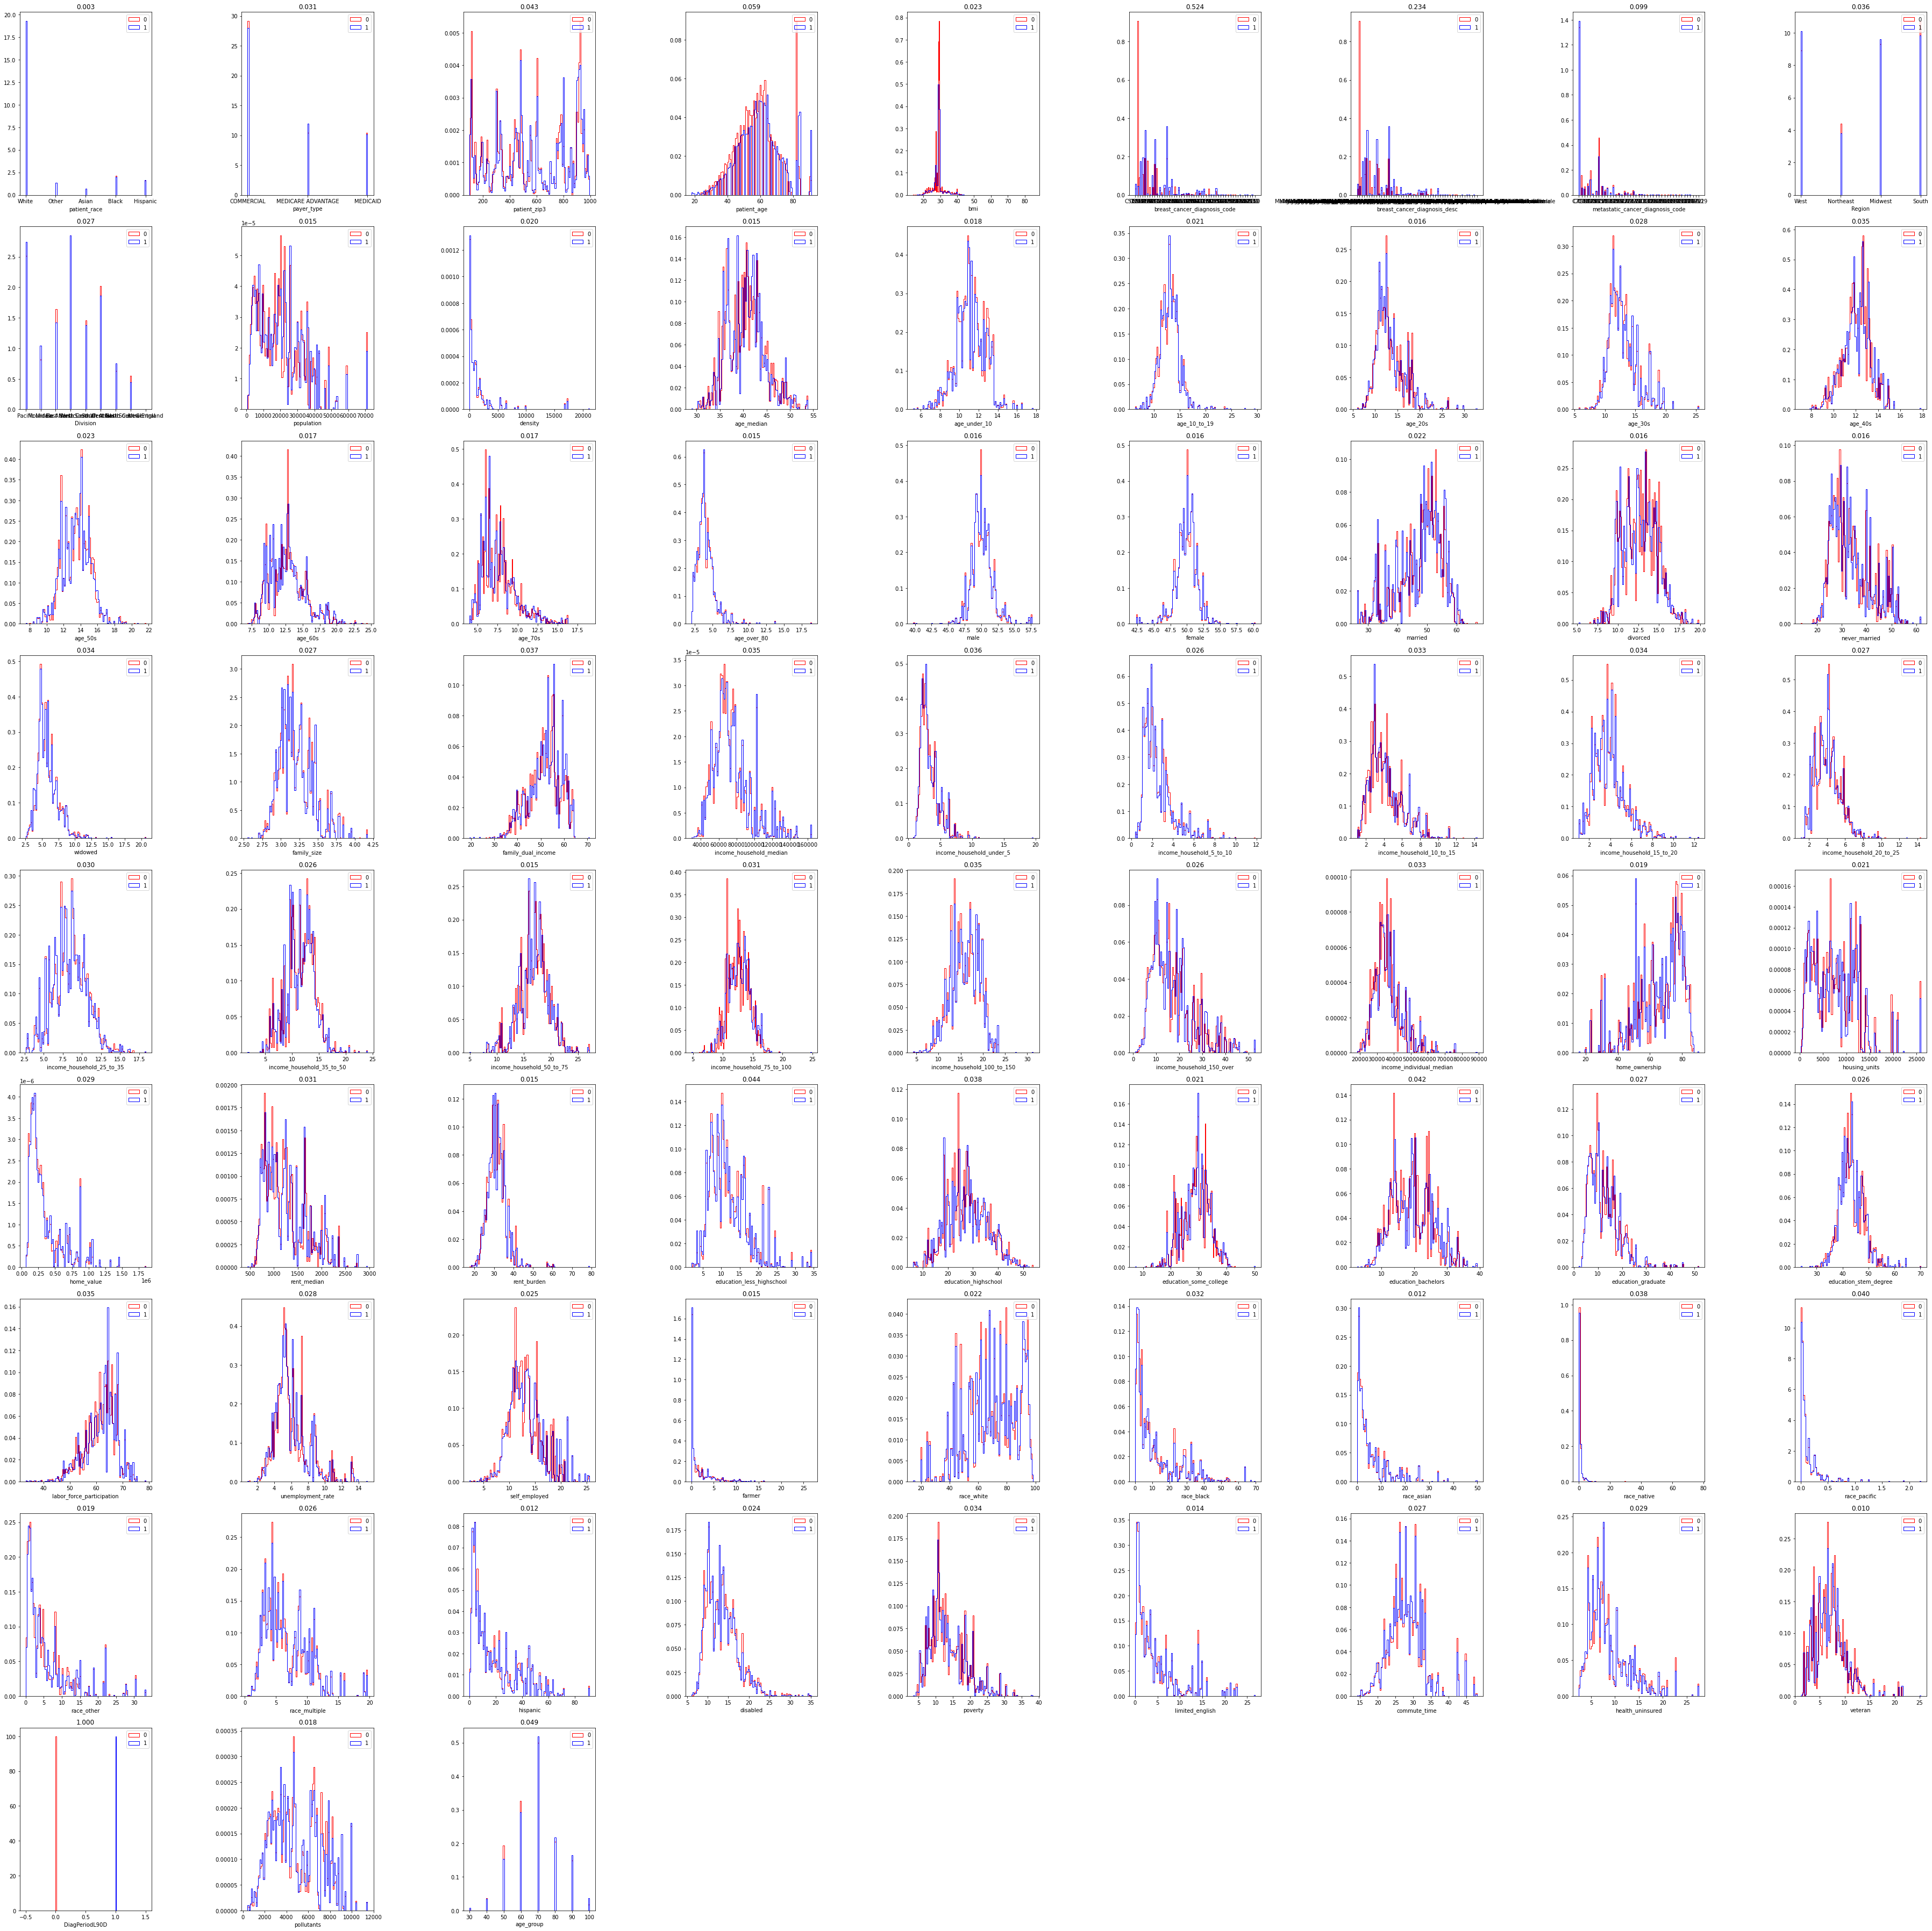

In [140]:
compare_features_binary(cleaned_train_df)

In [147]:
#compare_features_binary(prep_train_df)

### Note:
This visual and KS distribution is not useful for comparison. Test if normalization was applied appropriately.

In [142]:
c_clean_dfTR = prep_train_df.corr()
c_clean_dfTR

patient_zip3  patient_age       bmi  population  \
patient_zip3                     1.000000    -0.063854 -0.013392    0.100505   
patient_age                     -0.063854     1.000000 -0.125949   -0.018523   
bmi                             -0.013392    -0.125949  1.000000   -0.019907   
population                       0.100505    -0.018523 -0.019907    1.000000   
density                         -0.197270    -0.002521 -0.006312    0.732360   
age_median                      -0.148168     0.038998 -0.016000   -0.554173   
age_under_10                     0.062251    -0.026825  0.034993    0.257815   
age_10_to_19                     0.034184    -0.028972  0.008484    0.003223   
age_20s                          0.090206    -0.019147  0.000847    0.462311   
age_30s                          0.171139    -0.024197 -0.001706    0.638591   
age_40s                          0.085418    -0.027168 -0.018437    0.398361   
age_50s                         -0.208675     0.021877 -0.022690   -0.379967   
age_60s                         -0.088527     0.037117 -0.003384   -0.654640   
age_70s                         -0.086257     0.027925  0.003045   -0.542872   
age_over_80                     -0.160485     0.045067 -0.004122   -0.313463   
male                             0.316981    -0.018865 -0.010524   -0.313924   
female                          -0.317003     0.018865  0.010522    0.313885   
married                          0.065991    -0.002664 -0.014242   -0.433019   
divorced                        -0.047840     0.028242  0.037294   -0.363245   
never_married                    0.006295    -0.007412 -0.002791    0.593693   
widowed                         -0.291084     0.013943  0.034301   -0.489526   
family_size                      0.271396    -0.063017  0.000220    0.490326   
family_dual_income               0.049759    -0.003272 -0.034159    0.346574   
income_household_median          0.170379    -0.035898 -0.049036    0.291820   
income_household_under_5        -0.031381    -0.007726  0.022673    0.181443   
income_household_5_to_10        -0.157900     0.021826  0.033042   -0.002136   
income_household_10_to_15       -0.113492     0.006153  0.034942   -0.049187   
income_household_15_to_20       -0.165374     0.025940  0.033643   -0.248625   
income_household_20_to_25       -0.140806     0.011356  0.042911   -0.304241   
income_household_25_to_35       -0.147259     0.027066  0.046000   -0.373109   
income_household_35_to_50       -0.182004     0.034961  0.046243   -0.422813   
income_household_50_to_75       -0.088508     0.036529  0.033117   -0.462592   
income_household_75_to_100      -0.058024     0.028509  0.003699   -0.296947   
income_household_100_to_150      0.140447    -0.007878 -0.036977    0.142678   
income_household_150_over        0.176697    -0.039996 -0.049791    0.431136   
income_individual_median         0.122676    -0.027629 -0.041756    0.313948   
home_ownership                  -0.126354     0.030338 -0.002206   -0.723393   
housing_units                    0.045571    -0.009856 -0.018685    0.982869   
home_value                       0.340075    -0.053823 -0.040554    0.560457   
rent_median                      0.301740    -0.050984 -0.045360    0.632541   
rent_burden                      0.021088    -0.013189 -0.013386    0.441407   
education_less_highschool        0.174714    -0.062786  0.029972    0.269773   
education_highschool            -0.358178     0.028704  0.043365   -0.610799   
education_some_college           0.261925     0.030556  0.003319   -0.443527   
education_bachelors              0.145943    -0.002836 -0.045316    0.516157   
education_graduate              -0.036882    -0.006440 -0.039835    0.415917   
education_stem_degree            0.349517    -0.029433 -0.042756    0.264203   
labor_force_participation        0.047493    -0.004509 -0.022355    0.425367   
unemployment_rate                0.069819    -0.007713 -0.001246    0.270642   
self_employed                